In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/mobilenetv2/Barumobilenetv2.keras')


In [ ]:

# Tampilkan ringkasan model untuk melihat layer-layarnya
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,273,358 (8.67 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 10,250 (40.04 KB)

In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)


0 input_layer True
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_e

In [ ]:

# Aktifkan fine-tune untuk blok 16 (layer 143–156)
for layer in model.layers[143:157]:
    layer.trainable = True

In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)


0 input_layer True
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_e

In [ ]:
# Path ke dataset di Google Drive
train_dir = '/content/drive/MyDrive/Skindata/train'
valid_dir = '/content/drive/MyDrive/Skindata/val'
test_dir = '/content/drive/MyDrive/Skindata/test'

In [ ]:
# Parameter preprocessing
img_size = (224, 224)
batch_size = 32

In [ ]:
# Data augmentation dan preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
# Mengecek jumlah kelas
num_classes = len(train_generator.class_indices)
print("Class indices:", train_generator.class_indices)
print("Jumlah kelas:", num_classes)

Found 652 images belonging to 4 classes.
Found 140 images belonging to 4 classes.
Found 140 images belonging to 4 classes.
Class indices: {'eksim': 0, 'herpes': 1, 'melanoma': 2, 'normal': 3}
Jumlah kelas: 4


In [ ]:
from tensorflow.keras.optimizers import Adam
#compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
# Inisialisasi early stopping jika diperlukan
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Melatih model dengan menggunakan data generator
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    epochs=30,  # Tentukan jumlah epoch sesuai kebutuhan
    callbacks=[early_stop]  # Early stopping untuk menghentikan training jika val_loss tidak membaik
)


Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 626ms/step - accuracy: 0.8631 - loss: 0.3819 - val_accuracy: 0.8786 - val_loss: 0.3010
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 624ms/step - accuracy: 0.8828 - loss: 0.3730 - val_accuracy: 0.8786 - val_loss: 0.2975
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 618ms/step - accuracy: 0.8746 - loss: 0.3096 - val_accuracy: 0.8857 - val_loss: 0.2900
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 632ms/step - accuracy: 0.8279 - loss: 0.4074 - val_accuracy: 0.8929 - val_loss: 0.2863
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 611ms/step - accuracy: 0.8856 - loss: 0.3089 - val_accuracy: 0.8929 - val_loss: 0.2816
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 618ms/step - accuracy: 0.8780 - loss: 0.3163 - val_accuracy: 0.9000 - val_loss: 0.2777
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 619ms/step - accuracy: 0.8885 - loss: 0.2811 - val_accuracy: 0.9071 - val_loss: 0.2727
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 622ms/step - accuracy: 0.8699 - loss: 0.3140 - val_accu

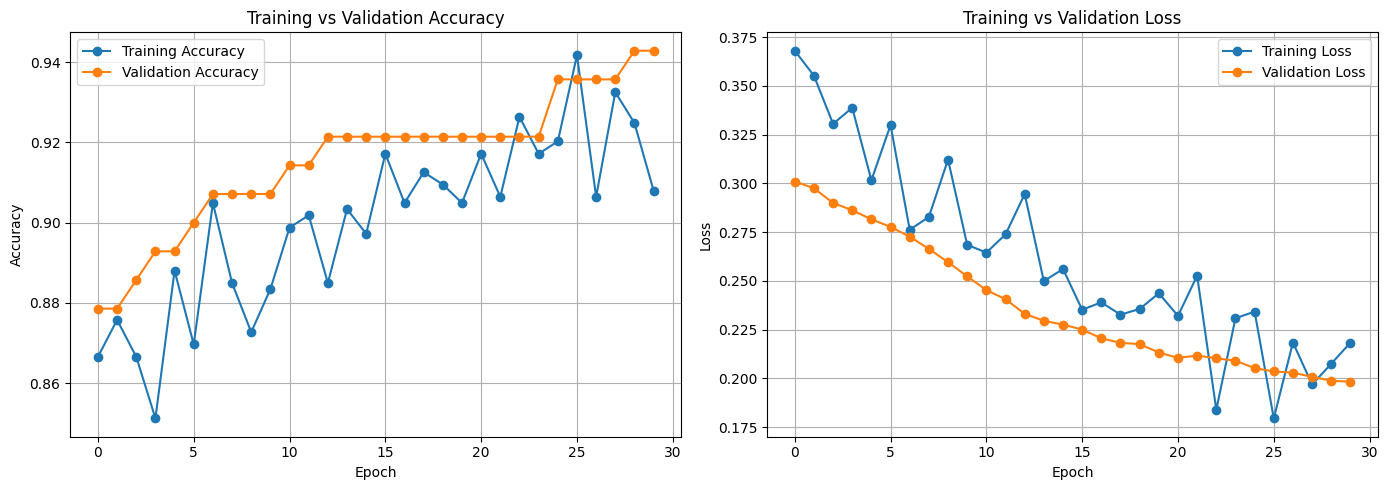

In [ ]:
import matplotlib.pyplot as plt

# Ambil nilai dari history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Buat 2 plot: akurasi & loss
plt.figure(figsize=(14, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:

# Evaluasi model menggunakan data validasi atau data uji
test_loss, test_accuracy = model.evaluate(valid_generator, steps=len(valid_generator))
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
loss, accuracy = model.evaluate(valid_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.9367 - loss: 0.2039
Test Loss: 0.19826571643352509
Test Accuracy: 0.9428571462631226
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.9367 - loss: 0.2039
Validation Loss: 0.1983
Validation Accuracy: 0.9429


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step


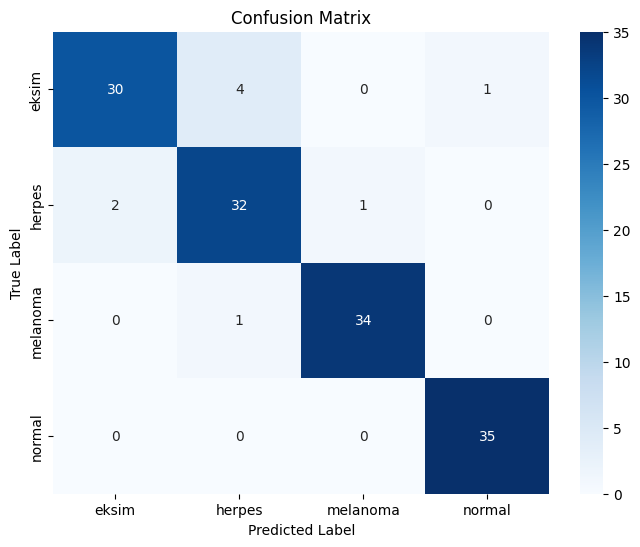

Classification Report:
              precision    recall  f1-score   support

       eksim       0.94      0.86      0.90        35
      herpes       0.86      0.91      0.89        35
    melanoma       0.97      0.97      0.97        35
      normal       0.97      1.00      0.99        35

    accuracy                           0.94       140
   macro avg       0.94      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

#confusion matrix
# 1. Prediksi kelas untuk data test
y_pred_prob = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(y_pred_prob, axis=1)

# 2. Label sebenarnya dari test_generator (karena shuffle=False)
y_true = test_generator.classes

# 3. Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Label kelas (dari generator)
class_names = list(test_generator.class_indices.keys())

# 5. Plot confusion matrix dengan seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (Precision, Recall, F1-score)
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:")
print(report)


##fine tuning lanjutan 3 blok


In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)


0 input_layer True
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_e

In [ ]:
#bekukan layer
for layer in model.layers:
    layer.trainable = False
# Aktifkan fine-tune untuk blok 14-16
for layer in model.layers[125:157]:
    layer.trainable = True

In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)


0 input_layer False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_

In [ ]:
# Path ke dataset di Google Drive
train_dir = '/content/drive/MyDrive/Skindata_experimen/train'
valid_dir = '/content/drive/MyDrive/Skindata_experimen/val'
test_dir = '/content/drive/MyDrive/Skindata_experimen/test'

In [ ]:
# Parameter preprocessing
img_size = (224, 224)
batch_size = 32

In [ ]:
# Data augmentation dan preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
# Mengecek jumlah kelas
num_classes = len(train_generator.class_indices)
print("Class indices:", train_generator.class_indices)
print("Jumlah kelas:", num_classes)

Found 1956 images belonging to 4 classes.
Found 140 images belonging to 4 classes.
Found 140 images belonging to 4 classes.
Class indices: {'eksim': 0, 'herpes': 1, 'melanoma': 2, 'normal': 3}
Jumlah kelas: 4


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Ambil semua label training langsung dari generator
labels = train_generator.classes

# Hitung class weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)


Class weights: {0: 0.6, 1: 0.6, 2: 3.0, 3: 3.0}


In [ ]:
from tensorflow.keras.optimizers import Adam
#compile model
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Inisialisasi early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3,min_lr=1e-7)

# Melatih model dengan menggunakan data generator
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    epochs=50,  # Tentukan jumlah epoch sesuai kebutuhan
    class_weight=class_weight_dict,
    callbacks=[early_stop, lr_scheduler]  # Early stopping untuk menghentikan training jika val_loss tidak membaik

)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.2867 - loss: 1.4175

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 68s 778ms/step - accuracy: 0.2877 - loss: 1.4151 - val_accuracy: 0.6429 - val_loss: 0.9092 - learning_rate: 1.0000e-05
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 35s 561ms/step - accuracy: 0.4885 - loss: 0.9288 - val_accuracy: 0.7214 - val_loss: 0.6816 - learning_rate: 1.0000e-05
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 555ms/step - accuracy: 0.5960 - loss: 0.7382 - val_accuracy: 0.7929 - val_loss: 0.5535 - learning_rate: 1.0000e-05
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 36s 587ms/step - accuracy: 0.6953 - loss: 0.5692 - val_accuracy: 0.8500 - val_loss: 0.4568 - learning_rate: 1.0000e-05
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 34s 544ms/step - accuracy: 0.7043 - loss: 0.5393 - val_accuracy: 0.8571 - val_loss: 0.3969 - learning_rate: 1.0000e-05
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 35s 564ms/step - accuracy: 0.7589 - loss: 0.4412 - val_accuracy: 0.8786 - val_loss: 0.3576 - learning_rate: 1.0000e-05
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 34s 541ms/step - accuracy: 0.78

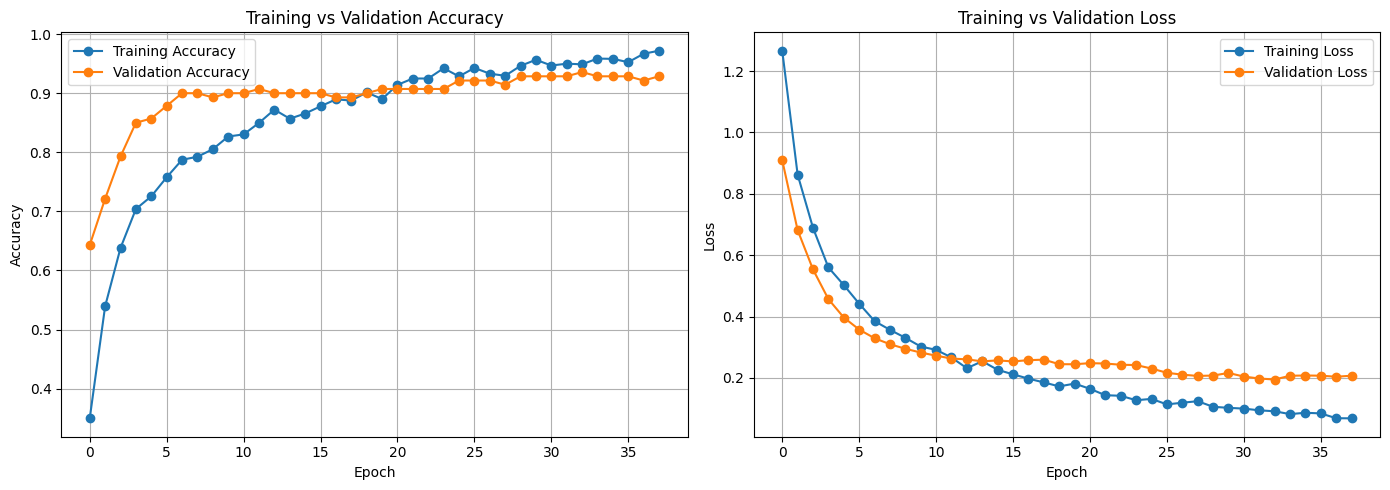

In [ ]:
import matplotlib.pyplot as plt

# Ambil nilai dari history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Buat 2 plot: akurasi & loss
plt.figure(figsize=(14, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:

# Evaluasi model menggunakan data validasi atau data uji
test_loss, test_accuracy = model.evaluate(valid_generator, steps=len(valid_generator))
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
loss, accuracy = model.evaluate(valid_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.9391 - loss: 0.1916
Test Loss: 0.1948268562555313
Test Accuracy: 0.9357143044471741
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.9391 - loss: 0.1916
Validation Loss: 0.1948
Validation Accuracy: 0.9357


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


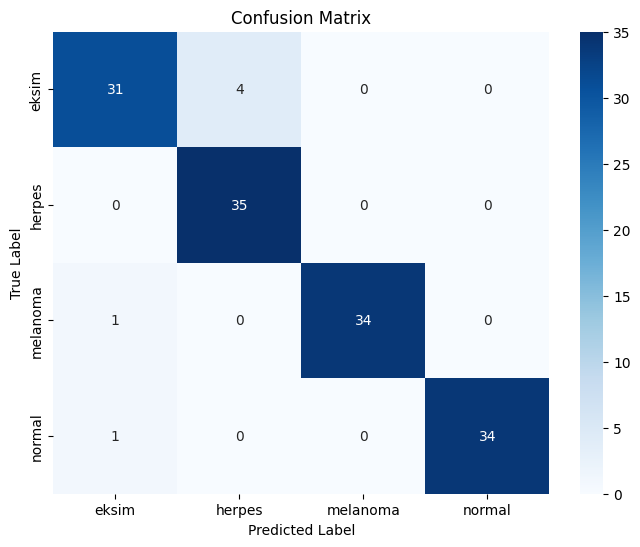

Classification Report:
              precision    recall  f1-score   support

       eksim       0.94      0.89      0.91        35
      herpes       0.90      1.00      0.95        35
    melanoma       1.00      0.97      0.99        35
      normal       1.00      0.97      0.99        35

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

#confusion matrix
# 1. Prediksi kelas untuk data test
y_pred_prob = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(y_pred_prob, axis=1)

# 2. Label sebenarnya dari test_generator (karena shuffle=False)
y_true = test_generator.classes

# 3. Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Label kelas (dari generator)
class_names = list(test_generator.class_indices.keys())

# 5. Plot confusion matrix dengan seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (Precision, Recall, F1-score)
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:")
print(report)


In [ ]:
# Menyimpan model ke file
model.save('mobilenetv2last.keras')
print("Model saved successfully!")


Model saved successfully!


##augmentasi offline

In [ ]:
import shutil

src_folder = '/content/drive/MyDrive/Skindata'
dst_folder = '/content/drive/MyDrive/Skindata_experimen'

# Menyalin folder
shutil.copytree(src_folder, dst_folder)
print("Folder berhasil disalin ke:", dst_folder)


Folder berhasil disalin ke: /content/drive/MyDrive/Skindata_experimen


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tqdm import tqdm


In [ ]:
# Ganti dengan path dataset final yang sudah dicopy tadi
base_dir = '/content/drive/MyDrive/Skindata_experimen/train'
target_classes = ['eksim', 'herpes']  # hanya untuk kelas ini


In [ ]:
augmentor = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
num_augmented_per_image = 4  # jumlah augmentasi per gambar

for class_name in target_classes:
    class_dir = os.path.join(base_dir, class_name)
    images = [img for img in os.listdir(class_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

    print(f"Memproses kelas: {class_name} ({len(images)} gambar)")

    for img_name in tqdm(images):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        aug_iter = augmentor.flow(img_array, batch_size=1)

        for i in range(num_augmented_per_image):
            aug_img = next(aug_iter)[0].astype(np.uint8)
            aug_pil = array_to_img(aug_img)
            new_filename = f"{os.path.splitext(img_name)[0]}_aug{i+1}.jpg"
            save_path = os.path.join(class_dir, new_filename)
            aug_pil.save(save_path)


Memproses kelas: eksim (163 gambar)


100%|██████████| 163/163 [01:11<00:00,  2.26it/s]


Memproses kelas: herpes (163 gambar)


100%|██████████| 163/163 [01:14<00:00,  2.19it/s]


In [ ]:
import os

base_dir = '/content/drive/MyDrive/Skindata_experimen/train'
target_classes = ['eksim', 'herpes']

total_images = 0

for class_name in target_classes:
    class_dir = os.path.join(base_dir, class_name)
    num_images = len([img for img in os.listdir(class_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png'))])
    print(f"Jumlah gambar di kelas {class_name}: {num_images}")
    total_images += num_images

print(f"\nTotal gambar di kelas 'eksim' dan 'herpes' (train): {total_images}")


Jumlah gambar di kelas eksim: 815
Jumlah gambar di kelas herpes: 815

Total gambar di kelas 'eksim' dan 'herpes' (train): 1630
